<a href="https://colab.research.google.com/github/rizalr04/Credit_Card_Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Portofolio/creditcard.csv')
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
print("Number of Rows", df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 284807
Number of Columns 31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df=df.drop(['Time'], axis=1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
df.shape

(284807, 30)

In [14]:
df.duplicated().any()

True

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(275663, 30)

In [17]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [18]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

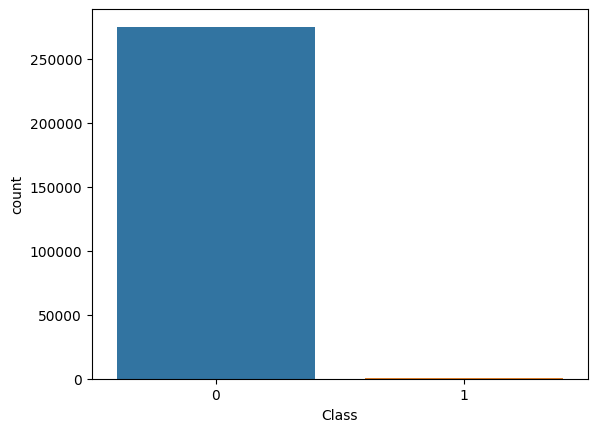

In [19]:
sns.countplot(x ='Class', data = df)

##Handling Imbalanced Dataset
1. Undersamling
2. Oversampling

###1. Undersampling

In [20]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [21]:
normal.shape

(275190, 30)

In [22]:
fraud.shape

(473, 30)

In [23]:
normal_sample = normal.sample(n=473)

In [24]:
normal_sample.shape

(473, 30)

In [25]:
df_undersampling = pd.concat([normal_sample,fraud], ignore_index=True)

<Axes: xlabel='Class', ylabel='count'>

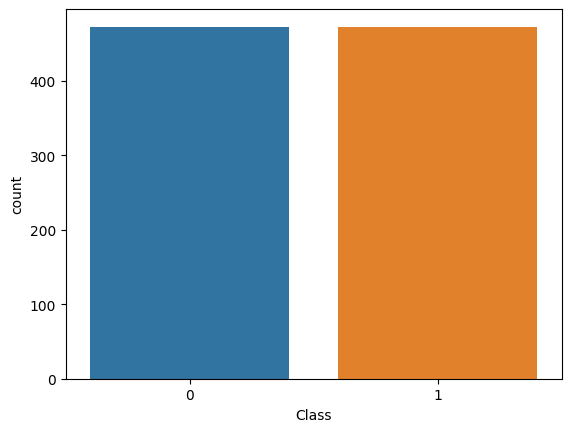

In [26]:
sns.countplot(x ='Class', data = df_undersampling)

In [27]:
df_undersampling['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [28]:
df_undersampling.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.581256,0.774659,1.555559,1.274494,0.242560,0.112014,0.304300,0.310817,-0.410143,0.114960,1.097479,0.431488,-1.207246,0.418681,-0.390242,-1.046515,0.511612,-0.135435,0.945784,0.107239,0.029515,0.334668,-0.113335,0.210744,-0.175105,-0.249694,0.416510,0.197130,-0.349231,0
1,1.246532,-0.021395,0.062981,0.392447,0.381498,0.993107,-0.263456,0.200175,0.262183,-0.120014,0.128023,1.451423,1.296138,-0.293464,-0.885664,-0.124334,-0.446744,-0.226519,0.623922,-0.033392,-0.087825,0.074964,-0.249616,-1.247167,0.707960,0.531487,0.004171,-0.014892,-0.349231,0
2,1.221095,0.292678,0.774041,1.104037,-0.556635,-0.756455,-0.088493,-0.102415,0.195356,-0.033751,-0.344833,0.255792,0.061147,0.232027,1.172229,0.376254,-0.549683,-0.188665,-0.364115,-0.142826,-0.195569,-0.559293,0.116994,0.341865,0.300526,-0.622522,0.037761,0.033775,-0.352750,0
3,-1.248570,-0.152736,2.505990,-0.307776,-3.148029,1.712827,0.045163,-0.688554,0.334592,0.111016,-0.594949,-0.095786,0.030962,-1.760120,-1.367701,-0.363961,1.741075,-1.849670,1.404300,-0.268941,0.876428,0.999800,-0.157650,0.723482,-0.128229,-0.015086,-0.239062,-0.506594,0.878501,0
4,1.034041,-1.212620,0.123248,-0.614508,-0.875644,0.117875,-0.474085,-0.010775,-0.685847,0.541188,0.477378,0.404377,0.703438,-0.435013,-1.094878,1.109020,0.068367,-1.045687,1.478297,0.506210,0.030435,-0.269113,-0.257292,-0.460398,0.469858,-0.320754,-0.016047,0.033014,0.442390,0


In [29]:
X = df_undersampling.drop('Class',axis=1)
y = df_undersampling['Class']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

**Logistic Regression**

In [31]:
log_us = LogisticRegression()
log_us.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred1_us = log_us.predict(X_test)

In [33]:
accuracy_log_us = accuracy_score(y_test, y_pred1_us)
print("Accuracy   :", accuracy_log_us)
precision_log_us = precision_score(y_test, y_pred1_us)
print("Precision :", precision_log_us)
recall_log_us = recall_score(y_test, y_pred1_us)
print("Recall    :", recall_log_us)
f1_score_log_us = f1_score(y_test, y_pred1_us)
print("F1_score  :", f1_score_log_us)

Accuracy   : 0.9421052631578948
Precision : 0.9789473684210527
Recall    : 0.9117647058823529
F1_score  : 0.9441624365482234


In [34]:
result1_us = ["1.","Logistic Regression"]
result1_us.append(accuracy_log_us*100)
result1_us.append(precision_log_us*100)
result1_us.append(recall_log_us*100)
result1_us.append(f1_score_log_us*100)
print(result1_us)

['1.', 'Logistic Regression', 94.21052631578948, 97.89473684210527, 91.17647058823529, 94.41624365482234]


**Random Forest Classifier**

In [35]:
rf_us= RandomForestClassifier()
rf_us.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred2_us = rf_us.predict(X_test)

In [37]:
accuracy_rf_us = accuracy_score(y_test, y_pred2_us)
print("Accuracy   :", accuracy_rf_us)
precision_rf_us = precision_score(y_test, y_pred2_us)
print("Precision :", precision_rf_us)
recall_rf_us = recall_score(y_test, y_pred2_us)
print("Recall    :", recall_rf_us)
f1_score_rf_us = f1_score(y_test, y_pred2_us)
print("F1_score  :", f1_score_rf_us)

Accuracy   : 0.9315789473684211
Precision : 0.968421052631579
Recall    : 0.9019607843137255
F1_score  : 0.934010152284264


In [38]:
result2_us = ["2.","Random Forest Classifier"]
result2_us.append(accuracy_rf_us*100)
result2_us.append(precision_rf_us*100)
result2_us.append(recall_rf_us*100)
result2_us.append(f1_score_rf_us*100)
print(result2_us)

['2.', 'Random Forest Classifier', 93.15789473684211, 96.84210526315789, 90.19607843137256, 93.4010152284264]


**Support Vector Machine**

In [39]:
svm_us = SVC()
svm_us.fit(X_train,y_train)

SVC()

In [40]:
y_pred3_us = svm_us.predict(X_test)

In [41]:
accuracy_svm_us = accuracy_score(y_test, y_pred3_us)
print("Accuracy   :", accuracy_svm_us)
precision_svm_us = precision_score(y_test, y_pred3_us)
print("Precision :", precision_svm_us)
recall_svm_us = recall_score(y_test, y_pred3_us)
print("Recall    :", recall_svm_us)
f1_score_svm_us = f1_score(y_test, y_pred3_us)
print("F1_score  :", f1_score_svm_us)

Accuracy   : 0.9315789473684211
Precision : 0.989010989010989
Recall    : 0.8823529411764706
F1_score  : 0.9326424870466321


In [42]:
result3_us = ["3.","Support Vector Machine"]
result3_us.append(accuracy_svm_us*100)
result3_us.append(precision_svm_us*100)
result3_us.append(recall_svm_us*100)
result3_us.append(f1_score_svm_us*100)
print(result3_us)

['3.', 'Support Vector Machine', 93.15789473684211, 98.9010989010989, 88.23529411764706, 93.26424870466322]


**XGBoost**

In [43]:
xgb_us = XGBClassifier()
xgb_us.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred4_us = xgb_us.predict(X_test)

In [45]:
accuracy_xgb_us = accuracy_score(y_test, y_pred4_us)
print("Accuracy   :", accuracy_xgb_us)
precision_xgb_us = precision_score(y_test, y_pred4_us)
print("Precision :", precision_xgb_us)
recall_xgb_us = recall_score(y_test, y_pred4_us)
print("Recall    :", recall_xgb_us)
f1_score_xgb_us = f1_score(y_test, y_pred4_us)
print("F1_score  :", f1_score_xgb_us)

Accuracy   : 0.9368421052631579
Precision : 0.9591836734693877
Recall    : 0.9215686274509803
F1_score  : 0.9400000000000001


In [46]:
result4_us = ["4.","XGBoost"]
result4_us.append(accuracy_xgb_us*100)
result4_us.append(precision_xgb_us*100)
result4_us.append(recall_xgb_us*100)
result4_us.append(f1_score_xgb_us*100)
print(result4_us)

['4.', 'XGBoost', 93.6842105263158, 95.91836734693877, 92.15686274509804, 94.0]


In [47]:
from prettytable import PrettyTable
print("\t\t\t\tUndersampling")
Result_table = PrettyTable(["S.No.","Model","Accuracy","Precison","Recall","F1 Score"])
Result_table.add_row(result1_us)
Result_table.add_row(result2_us)
Result_table.add_row(result3_us)
Result_table.add_row(result4_us)
print(Result_table)

				Undersampling
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+
| S.No. |          Model           |      Accuracy     |      Precison     |       Recall      |      F1 Score     |
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+
|   1.  |   Logistic Regression    | 94.21052631578948 | 97.89473684210527 | 91.17647058823529 | 94.41624365482234 |
|   2.  | Random Forest Classifier | 93.15789473684211 | 96.84210526315789 | 90.19607843137256 |  93.4010152284264 |
|   3.  |  Support Vector Machine  | 93.15789473684211 |  98.9010989010989 | 88.23529411764706 | 93.26424870466322 |
|   4.  |         XGBoost          |  93.6842105263158 | 95.91836734693877 | 92.15686274509804 |        94.0       |
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+


In [48]:
final_us = pd.DataFrame({'Models':['LR','RF','SVM','XGBoost'],
                         'Acc':[accuracy_log_us*100,
                                accuracy_rf_us*100,
                                accuracy_svm_us*100,
                                accuracy_xgb_us*100]})

In [49]:
final_us

,Models,Acc
0,LR,94.210526
1,RF,93.157895
2,SVM,93.157895
3,XGBoost,93.684211


<Axes: xlabel='Models', ylabel='Acc'>

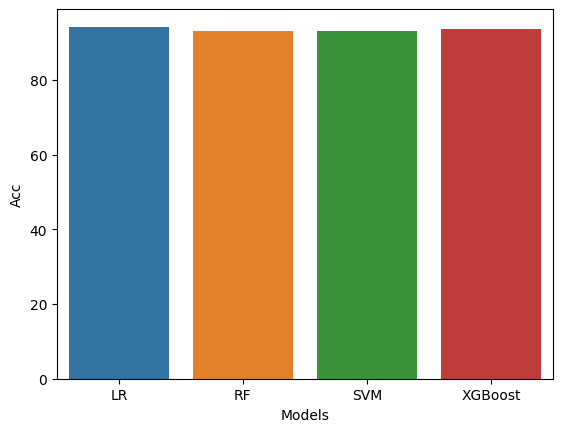

In [50]:
sns.barplot(x ='Models', y='Acc', data = final_us)

###2. Oversampling

In [51]:
X = df.drop('Class',axis=1)
y = df['Class']

In [52]:
X.shape

(275663, 29)

In [53]:
y.shape

(275663,)

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
X_res,y_res = SMOTE().fit_resample(X,y)

<Axes: xlabel='Class', ylabel='count'>

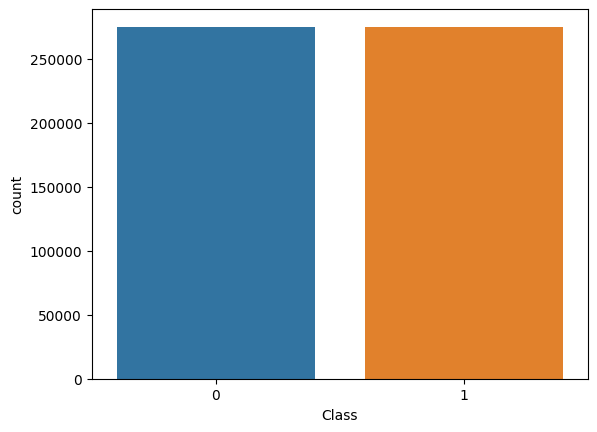

In [56]:
sns.countplot(x =y_res)

In [57]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

**Logistic Regression**

In [59]:
log_os = LogisticRegression()
log_os.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred1_os = log_os.predict(X_test)

In [61]:
accuracy_log_os = accuracy_score(y_test, y_pred1_os)
print("Accuracy   :", accuracy_log_os)
precision_log_os = precision_score(y_test, y_pred1_os)
print("Precision :", precision_log_os)
recall_log_os = recall_score(y_test, y_pred1_os)
print("Recall    :", recall_log_os)
f1_score_log_os = f1_score(y_test, y_pred1_os)
print("F1_score  :", f1_score_log_os)

Accuracy   : 0.9445292343471783
Precision : 0.9728642438543218
Recall    : 0.9144955729687472
F1_score  : 0.9427773508518733


In [62]:
result1_os = ["1.","Logistic Regression"]
result1_os.append(accuracy_log_os*100)
result1_os.append(precision_log_os*100)
result1_os.append(recall_log_os*100)
result1_os.append(f1_score_log_os*100)
print(result1_os)

['1.', 'Logistic Regression', 94.45292343471783, 97.28642438543218, 91.44955729687472, 94.27773508518733]


**Random Forest Classifier**

In [63]:
rf_os= RandomForestClassifier()
rf_os.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred2_os = rf_os.predict(X_test)

In [65]:
accuracy_rf_os = accuracy_score(y_test, y_pred2_os)
print("Accuracy   :", accuracy_rf_os)
precision_rf_os = precision_score(y_test, y_pred2_os)
print("Precision :", precision_rf_os)
recall_rf_os = recall_score(y_test, y_pred2_os)
print("Recall    :", recall_rf_os)
f1_score_rf_os = f1_score(y_test, y_pred2_os)
print("F1_score  :", f1_score_rf_os)

Accuracy   : 0.999918238308078
Precision : 0.9998363993310551
Recall    : 1.0
F1_score  : 0.9999181929736854


In [66]:
result2_os = ["2.","Random Forest Classifier"]
result2_os.append(accuracy_rf_os*100)
result2_os.append(precision_rf_os*100)
result2_os.append(recall_rf_os*100)
result2_os.append(f1_score_rf_os*100)
print(result2_os)

['2.', 'Random Forest Classifier', 99.9918238308078, 99.98363993310551, 100.0, 99.99181929736855]


**Support Vector Machine**

In [67]:
svm_os = SVC()
svm_os.fit(X_train,y_train)

SVC()

In [68]:
y_pred3_os = svm_os.predict(X_test)

In [69]:
accuracy_svm_os = accuracy_score(y_test, y_pred3_os)
print("Accuracy   :", accuracy_svm_os)
precision_svm_os = precision_score(y_test, y_pred3_os)
print("Precision :", precision_svm_os)
recall_svm_os = recall_score(y_test, y_pred3_os)
print("Recall    :", recall_svm_os)
f1_score_svm_os = f1_score(y_test, y_pred3_os)
print("F1_score  :", f1_score_svm_os)

Accuracy   : 0.9807224099712926
Precision : 0.9832580922267102
Recall    : 0.9780739232405505
F1_score  : 0.9806591563673484


In [70]:
result3_os = ["3.","Support Vector Machine"]
result3_os.append(accuracy_svm_os*100)
result3_os.append(precision_svm_os*100)
result3_os.append(recall_svm_os*100)
result3_os.append(f1_score_svm_os*100)
print(result3_os)

['3.', 'Support Vector Machine', 98.07224099712926, 98.32580922267103, 97.80739232405506, 98.06591563673483]


**XGBoost**

In [71]:
xgb_os = XGBClassifier()
xgb_os.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred4_os = xgb_os.predict(X_test)

In [73]:
accuracy_xgb_os = accuracy_score(y_test, y_pred4_os)
print("Accuracy   :", accuracy_xgb_os)
precision_xgb_os = precision_score(y_test, y_pred4_os)
print("Precision :", precision_xgb_os)
recall_xgb_os = recall_score(y_test, y_pred4_os)
print("Recall    :", recall_xgb_os)
f1_score_xgb_os = f1_score(y_test, y_pred4_os)
print("F1_score  :", f1_score_xgb_os)

Accuracy   : 0.9997183763944911
Precision : 0.9994367118508558
Recall    : 1.0
F1_score  : 0.9997182765796959


In [75]:
result4_os = ["4.","XGBoost"]
result4_os.append(accuracy_xgb_os*100)
result4_os.append(precision_xgb_os*100)
result4_os.append(recall_xgb_os*100)
result4_os.append(f1_score_xgb_os*100)
print(result4_os)

['4.', 'XGBoost', 99.9718376394491, 99.94367118508558, 100.0, 99.9718276579696]


In [76]:
from prettytable import PrettyTable
print("\t\t\t\tOversampling")
Result_table = PrettyTable(["S.No.","Model","Accuracy","Precison","Recall","F1 Score"])
Result_table.add_row(result1_os)
Result_table.add_row(result2_os)
Result_table.add_row(result3_os)
Result_table.add_row(result4_os)
print(Result_table)

				Oversampling
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+
| S.No. |          Model           |      Accuracy     |      Precison     |       Recall      |      F1 Score     |
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+
|   1.  |   Logistic Regression    | 94.45292343471783 | 97.28642438543218 | 91.44955729687472 | 94.27773508518733 |
|   2.  | Random Forest Classifier |  99.9918238308078 | 99.98363993310551 |       100.0       | 99.99181929736855 |
|   3.  |  Support Vector Machine  | 98.07224099712926 | 98.32580922267103 | 97.80739232405506 | 98.06591563673483 |
|   4.  |         XGBoost          |  99.9718376394491 | 99.94367118508558 |       100.0       |  99.9718276579696 |
+-------+--------------------------+-------------------+-------------------+-------------------+-------------------+


In [77]:
final_os = pd.DataFrame({'Models':['LR','RF','SVM','XGBoost'],
                         'Acc':[accuracy_log_os*100,
                                accuracy_rf_os*100,
                                accuracy_svm_os*100,
                                accuracy_xgb_os*100]})

In [78]:
final_os

,Models,Acc
0,LR,94.452923
1,RF,99.991824
2,SVM,98.072241
3,XGBoost,99.971838


<Axes: xlabel='Models', ylabel='Acc'>

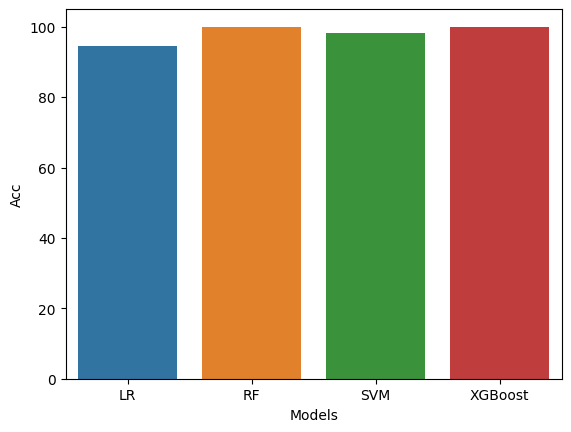

In [79]:
sns.barplot(x ='Models', y='Acc', data = final_os)